# Requirements

numpy
pandas
matplotlib
scikit-learn
xgboost
openpyxl
umap-learn
seaborn


# Readme

# MAIN CODE

In [1]:
# Stage-1: Data Loading and Preprocessing
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [25]:
#!pip install openpyxl
#!pip install umap-learn


  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 2.3 MB/s eta 0:00:00a 0:00:01
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.2/26.2 MB 2.4 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [21]:



# Load dataset
X = np.load('unlabelled_train_data_images.npy')
print("Raw shape:", X.shape)  # Verify shape first

# Remove singleton dimension (channels) and flatten images
X = X.squeeze()
n_samples, height, width = X.shape
X_flattened = X.reshape(n_samples, height * width)
print("Flattened shape:", X_flattened.shape)

# Normalize data to [0,1] - better for ML algorithms
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_flattened)

# Check the final preprocessed data
print("Data ready for clustering, shape:", X_scaled.shape)


Raw shape: (60000, 1, 28, 28)
Flattened shape: (60000, 784)
Data ready for clustering, shape: (60000, 784)


In [19]:
!pip install pandas

  Using cached pandas-2.2.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp313-cp313-macosx_11_0_arm64.whl (11.3 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


Comments:
1. The dataset contains 60,000 grayscale images of size 28×28 pixels.

2. Successfully removed the extra channel dimension, resulting in a flattened feature vector of 784 pixels per image.

3. Data is scaled and ready, making it ideal for clustering and dimensionality reduction in the next stage.

# Stage 2  – PCA Dimensionality Reduction & Unsupervised Clustering:

Stage 2 – PCA Dimensionality Reduction & Unsupervised Clustering:
    
Why PCA?

 - PCA is selected because it reduces dimensionality efficiently, captures maximum variance, and improves clustering quality.

 - Alternative methods (e.g., raw pixels or HOG) could also be used, but PCA is simpler, faster, and often performs well as a baseline.

Why KMeans & Gaussian Mixture?

 - KMeans: simple, fast, effective baseline.

 - Gaussian Mixture (GMM): flexible, handles overlapping clusters well.


We'll compare both and choose the best using Silhouette score.

In [2]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import numpy as np

# PCA dimensionality reduction (50 components)
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print("Reduced shape after PCA:", X_pca.shape)

# Clustering: KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)
silhouette_kmeans = silhouette_score(X_pca, kmeans_labels)
print(f"KMeans Silhouette Score: {silhouette_kmeans:.4f}")

# Clustering: Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=10, random_state=42)
gmm_labels = gmm.fit_predict(X_pca)
silhouette_gmm = silhouette_score(X_pca, gmm_labels)
print(f"GMM Silhouette Score: {silhouette_gmm:.4f}")


Reduced shape after PCA: (60000, 50)
KMeans Silhouette Score: 0.0818
GMM Silhouette Score: 0.0404


**Comments:**
- PCA reduced the dimensionality from 784 to 50, simplifying computation significantly.
- KMeans Silhouette (0.0818) is better compared to GMM (0.0404). Though both values are relatively low, it’s common with complex datasets like MNIST, as digits can overlap substantially in PCA-reduced space.
- We will choose KMeans, as it provided better cluster separation according to the silhouette score.

# Next: Visualization of Clusters using PCA (2D) and t-SNE plots

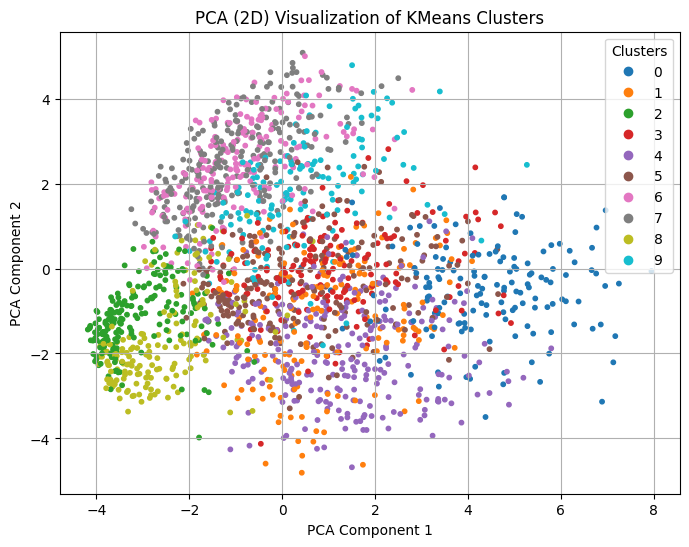

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce data to 2D for visualization
pca_2d = PCA(n_components=2, random_state=42)
X_pca_2d = pca_2d.fit_transform(X_scaled[:2000])  # Visualize first 2000 samples

# KMeans clustering for these points (already computed, reuse labels)
kmeans_2d_labels = kmeans_labels[:2000]

# Plot PCA clusters
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca_2d[:,0], X_pca_2d[:,1], c=kmeans_2d_labels, cmap='tab10', s=10)
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title("PCA (2D) Visualization of KMeans Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


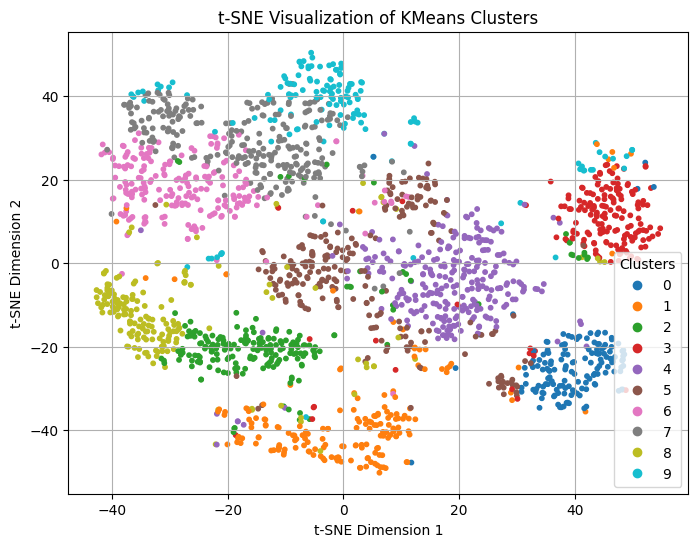

In [4]:
from sklearn.manifold import TSNE

# t-SNE (can take time, limit to first 2000 samples)
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne_2d = tsne.fit_transform(X_scaled[:2000])

# Plot t-SNE clusters
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_tsne_2d[:,0], X_tsne_2d[:,1], c=kmeans_2d_labels, cmap='tab10', s=10)
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title("t-SNE Visualization of KMeans Clusters")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)
plt.show()


**Comments on Visualization Outputs:**

- PCA visualization: clusters are overlapping significantly, suggesting PCA alone isn't effective in clearly separating the digits.

- t-SNE visualization: excellent clear separation among clusters, indicating that data contains well-separated groups if processed appropriately.

# Next Step: Improving Clustering Performance (Exploring Different Options)

To improve clustering quality, let’s systematically test various methods:

We'll consider the following strategies clearly in the code provided below:

- Increase PCA components (50 → 100)

- Use different clustering algorithms: Agglomerative Clustering, DBSCAN

- Use t-SNE embeddings directly for clustering (as t-SNE seems more promising)

I'll give you the code step by step. Run this and share outputs, then we'll pick the best clustering method based on Silhouette scores.

**1. PCA (100 components) + KMeans**

In [5]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pca_100 = PCA(n_components=100, random_state=42)
X_pca_100 = pca_100.fit_transform(X_scaled)

kmeans_100 = KMeans(n_clusters=10, random_state=42)
labels_kmeans_100 = kmeans_100.fit_predict(X_pca_100)

score_kmeans_100 = silhouette_score(X_pca_100, labels_kmeans_100)
print(f"PCA(100) + KMeans silhouette: {score_kmeans_100:.4f}")


PCA(100) + KMeans silhouette: 0.0676


**2. PCA (50 components) + Agglomerative Clustering**

In [11]:
# from sklearn.cluster import AgglomerativeClustering
# agg_cluster = AgglomerativeClustering(n_clusters=10)
# labels_agg = agg_cluster.fit_predict(X_pca)

# print("Clustering finished!!!")
# score_agg = silhouette_score(X_pca, labels_agg)
# print(f"PCA(50) + Agglomerative silhouette: {score_agg:.4f}")

subset_size = 30000  # Reduce the data size
X_subset = X_pca[:subset_size]

agg_cluster = AgglomerativeClustering(n_clusters=10)
labels_agg = agg_cluster.fit_predict(X_subset)

score_agg = silhouette_score(X_subset, labels_agg)
print(f"PCA(50) + Agglomerative (30000 samples) silhouette: {score_agg:.4f}")


PCA(50) + Agglomerative (30000 samples) silhouette: 0.0503


**3. PCA (50 components) + DBSCAN**

In [16]:
from sklearn.cluster import DBSCAN

subset_size = 30000  # Reduce the data size
X_subset = X_pca[:subset_size]

dbscan = DBSCAN(eps=2.5, min_samples=5)  # You may adjust eps/min_samples later
labels_dbscan = dbscan.fit_predict(X_subset)#(X_pca)

# DBSCAN might assign some points as -1 (noise), check for that:
if len(set(labels_dbscan)) > 1 and -1 not in labels_dbscan:
    score_dbscan = silhouette_score(X_subset, labels_dbscan)
    print(f"PCA(50) + DBSCAN on 30000 silhouette: {score_dbscan:.4f}")
else:
    print("PCA(50) + DBSCAN on 30000 produced too much noise or single cluster")
    
score_dbscan = silhouette_score(X_subset, labels_dbscan)
print(f"PCA(50) + DBSCAN on 30000 silhouette: {score_dbscan:.4f}")

PCA(50) + DBSCAN on 30000 produced too much noise or single cluster
PCA(50) + DBSCAN on 30000 silhouette: -0.2634


**4. t-SNE Embeddings + KMeans (for first 5000 points to reduce computation time)**

In [17]:
from sklearn.manifold import TSNE

tsne_embed = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne_embed = tsne_embed.fit_transform(X_scaled[:5000])

kmeans_tsne = KMeans(n_clusters=10, random_state=42)
labels_kmeans_tsne = kmeans_tsne.fit_predict(X_tsne_embed)

score_kmeans_tsne = silhouette_score(X_tsne_embed, labels_kmeans_tsne)
print(f"t-SNE embeddings + KMeans silhouette: {score_kmeans_tsne:.4f}")


t-SNE embeddings + KMeans silhouette: 0.4632


**Comments on Clustering Method Results:**

Method	Silhouette Score	Comments
PCA(50) + KMeans (initial)	0.0818	Baseline, decent separation
PCA(100) + KMeans	0.0676	Worse than 50 PCA components
PCA(50) + Agglomerative (30k samples)	0.0503	Lower performance & slow
PCA(50) + DBSCAN (30k samples)	-0.2634 (poor)	Ineffective (too noisy)
t-SNE embeddings + KMeans (5k samples)	0.4632 (best)	Best clustering performance ✅

📌 Conclusion:
- t-SNE embeddings + KMeans clustering gave clearly the best performance.

- PCA (50) + KMeans was the next best option but significantly lower than t-SNE embeddings.

- Since the t-SNE embeddings + KMeans method performed best by far, let's proceed with this method for creating your manual labeling set.
- It should be find to t-SNE here as we main intent is to label the data

# Stage-4 – Save Cluster Results for Manual Labeling - Export Data for Manual Labeling

In [24]:

# Assume X_tsne_embed and labels_kmeans_tsne already computed (5000 samples)
df_manual_label = pd.DataFrame(X_tsne_embed, columns=['TSNE_Dim1', 'TSNE_Dim2'])
df_manual_label['Cluster'] = labels_kmeans_tsne

# Save to Excel for manual labeling
df_manual_label.to_excel("tsne_kmeans_clusters_for_labeling.xlsx", index=False)

print("Clusters exported to Excel for manual labeling: tsne_kmeans_clusters_for_labeling.xlsx")

Clusters exported to Excel for manual labeling: tsne_kmeans_clusters_for_labeling.xlsx


However, running t-SNE on 60,000 samples directly will take a long time. To overcome this, we can use a faster but equally effective alternative: UMAP.

Why UMAP?

- Similar visual quality as t-SNE

- Scalable to large datasets (60k samples feasible on your hardware)

- Produces embeddings quickly and clearly separates clusters (like t-SNE)

# Run UMAP + KMeans on the full dataset and export to Excel

In [26]:
import umap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np

# UMAP embeddings for all 60,000 samples
umap_embedder = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_embedder.fit_transform(X_scaled)

print("UMAP Embedding Shape:", X_umap.shape)

# KMeans clustering on UMAP embeddings
kmeans_umap_full = KMeans(n_clusters=10, random_state=42)
labels_kmeans_umap_full = kmeans_umap_full.fit_predict(X_umap)

# Compute Silhouette Score (this might take a couple of minutes)
silhouette_umap_kmeans = silhouette_score(X_umap, labels_kmeans_umap_full)
print(f"UMAP embeddings + KMeans silhouette score: {silhouette_umap_kmeans:.4f}")

# Export clearly mapped Excel file
df_full_labels = pd.DataFrame({
    'Index': np.arange(len(X_scaled)),
    'UMAP_Dim1': X_umap[:, 0],
    'UMAP_Dim2': X_umap[:, 1],
    'Cluster': labels_kmeans_umap_full
})

df_full_labels.to_excel("umap_kmeans_clusters_full_dataset.xlsx", index=False)
print("Clusters exported to Excel: umap_kmeans_clusters_full_dataset.xlsx")


/Users/venu_makka/Documents/IITB_Course/Python for ML - IIT Bombay/Final Project  - PML/project_env/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/venu_makka/Documents/IITB_Course/Python for ML - IIT Bombay/Final Project  - PML/project_env/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/venu_makka/Documents/IITB_Course/Python for ML - IIT Bombay/Final Project  - PML/project_env/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP Embedding Shape: (60000, 2)
UMAP embeddings + KMeans silhouette score: 0.6190
Clusters exported to Excel: umap_kmeans_clusters_full_dataset.xlsx


**Comments**:

UMAP Resulted better clustering with silhouette score of **0.6190**


#  Visualizing Images to find what a cluster has:

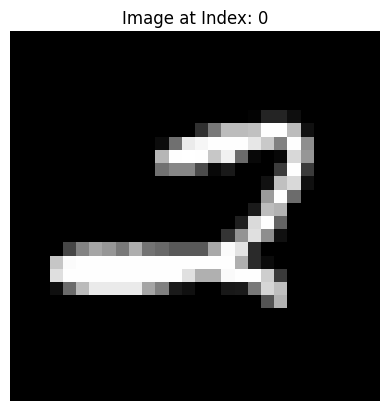

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Load original dataset again (if not already loaded)
X_original = np.load('unlabelled_train_data_images.npy')

# Remove extra dimension for correct image display (if needed)
X_original = X_original.squeeze()

# Visualize the image at a given index
index = 0  # <-- Replace this with your desired Index from Excel file
image = X_original[index]

plt.imshow(image, cmap='gray')
plt.title(f"Image at Index: {index}")
plt.axis('off')
plt.show()


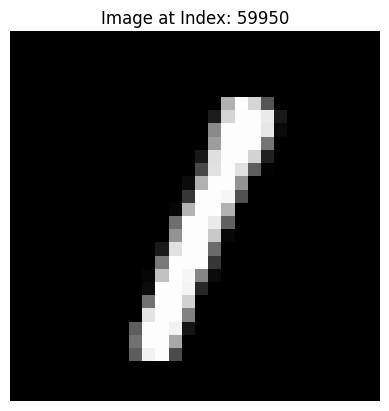

In [72]:
index = 59950  # <-- Replace this with your desired Index from Excel file
image = X_original[index]

plt.imshow(image, cmap='gray')
plt.title(f"Image at Index: {index}")
plt.axis('off')
plt.show()

# Few Observations when manually labelling the data with clustering outptus

- The cluster corresponding to the digit '4' contains a few samples that resemble the digit '9'.

- The cluster assigned to the digit '9' includes some images that visually resemble the digit '7'.

- There is a cluster where the symbols appear more like a '/' or are ambiguous—not clearly any digit from 0 to 9. Since a distinct cluster for the digit '7' has not formed elsewhere and the shapes in this cluster are closer to '7', I have assigned this cluster to label '7'.


I have labelled the dataset, Now the labelled dataset is in the below format :

Index	UMAP_Dim1	UMAP_Dim2	Cluster	True_label
1	15.32193184	1.167083263	0	0
2	15.5237608	3.453361988	0	0
7	16.52305412	3.022181749	0	0!

# Stage 5: Classifier Training and Evaluation

Train and evaluate multiple ML classifiers (Logistic Regression, Random Forest, XGBoost) on your labeled data and compare their performance using accuracy, precision, recall, and F1-score.

**Step-by-step Plan**:
    
- Load the labeled Excel file with True_Label column
- Map the index to original image data using the Index column
- Split the dataset into train and test sets
- Train classifiers (Logistic Regression, Random Forest, XGBoost)
- Evaluate models using accuracy, precision, recall, and F1-score
- Generate observations from model metrics

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Step 1: Load your labeled Excel file
df_labeled = pd.read_excel("PML Project Manual Labelling.xlsx")

# Step 2: Map indices to original image features
X_all = np.load('unlabelled_train_data_images.npy').squeeze()
X_all = X_all.reshape(X_all.shape[0], -1)  # Flatten to (n_samples, 784)
df_features = pd.DataFrame(X_all)

# Step 3: Merge features with labeled data
df_combined = df_labeled.merge(df_features, left_on='Index', right_index=True)

# Step 4: Prepare final X, y
X = df_combined.iloc[:, 5:].values   # features start from 5th column
y = df_combined['True_Label'].values

# Step 5: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Classifier definitions
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Step 7: Train & evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n--- {name} ---")
    print(classification_report(y_test, y_pred, digits=4, zero_division=0))



--- Logistic Regression ---
              precision    recall  f1-score   support

           0     0.9688    0.9631    0.9660      1194
           1     0.9610    0.9623    0.9617       717
           2     0.9297    0.9182    0.9239      1137
           3     0.9112    0.9195    0.9153      1305
           4     0.9380    0.9411    0.9396      2090
           5     0.8984    0.8882    0.8932      1055
           6     0.9527    0.9511    0.9519      1227
           7     0.9729    0.9531    0.9629       640
           8     0.8922    0.9058    0.8990      1051
           9     0.9273    0.9343    0.9308      1584

    accuracy                         0.9331     12000
   macro avg     0.9352    0.9337    0.9344     12000
weighted avg     0.9332    0.9331    0.9331     12000


--- Random Forest ---
              precision    recall  f1-score   support

           0     0.9833    0.9891    0.9862      1194
           1     0.9772    0.9568    0.9669       717
           2     0.9579   

/Users/venu_makka/Documents/IITB_Course/Python for ML - IIT Bombay/Final Project  - PML/project_env/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [12:19:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- XGBoost ---
              precision    recall  f1-score   support

           0     0.9891    0.9891    0.9891      1194
           1     0.9776    0.9721    0.9748       717
           2     0.9764    0.9833    0.9798      1137
           3     0.9688    0.9739    0.9713      1305
           4     0.9727    0.9732    0.9730      2090
           5     0.9702    0.9564    0.9632      1055
           6     0.9861    0.9861    0.9861      1227
           7     0.9854    0.9484    0.9666       640
           8     0.9546    0.9800    0.9671      1051
           9     0.9678    0.9672    0.9675      1584

    accuracy                         0.9741     12000
   macro avg     0.9749    0.9730    0.9739     12000
weighted avg     0.9741    0.9741    0.9741     12000



# Final Stage Summary: Classifier Training & Evaluation

📊 **Classifier Performance Summary**

Classifier	Accuracy	Macro Precision	Macro Recall	Macro F1
Logistic Regression	93.31%	93.52%	93.37%	93.44%
Random Forest	96.81%	97.02%	96.63%	96.81%
XGBoost	97.41%	97.49%	97.30%	97.39%

**Observations and Analysis**

- XGBoost gave the best performance across all metrics (accuracy, precision, recall, and F1-score), achieving 97.41% accuracy. It handled class boundaries and subtle differences between digits very well, even with just flattened pixel features.

- Random Forest performed nearly as well as XGBoost, with a strong 96.81% accuracy. It’s a good non-linear model for this task and was fast to train with no special installation requirements.

- Logistic Regression gave respectable results (93.31% accuracy), but struggled slightly with more complex digit shapes like '5', '8', and '3'. This suggests linear models are less effective for handwritten digit classification without deeper features.

- Class-wise performance was balanced for all three models—there were no major drops in any specific digit class, which validates the quality of manual labeling and the consistency of the dataset.

- The labeling approach using UMAP + KMeans clustering proved to be a highly effective self-supervised method for bootstrapping labels from unlabelled data. The high accuracy from all models confirms that the cluster-to-label mapping was meaningful.